In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from inspect import signature
import sklearn
from sklearn import linear_model,dummy,metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

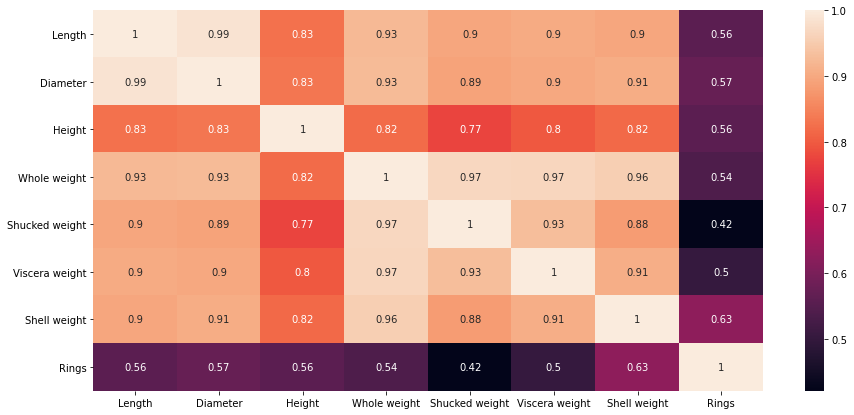

In [5]:
df_corr=data.corr().abs() 

plt.figure(figsize=(15,7))
sns.heatmap(df_corr,annot=True,  annot_kws={'size':10})
plt.show()

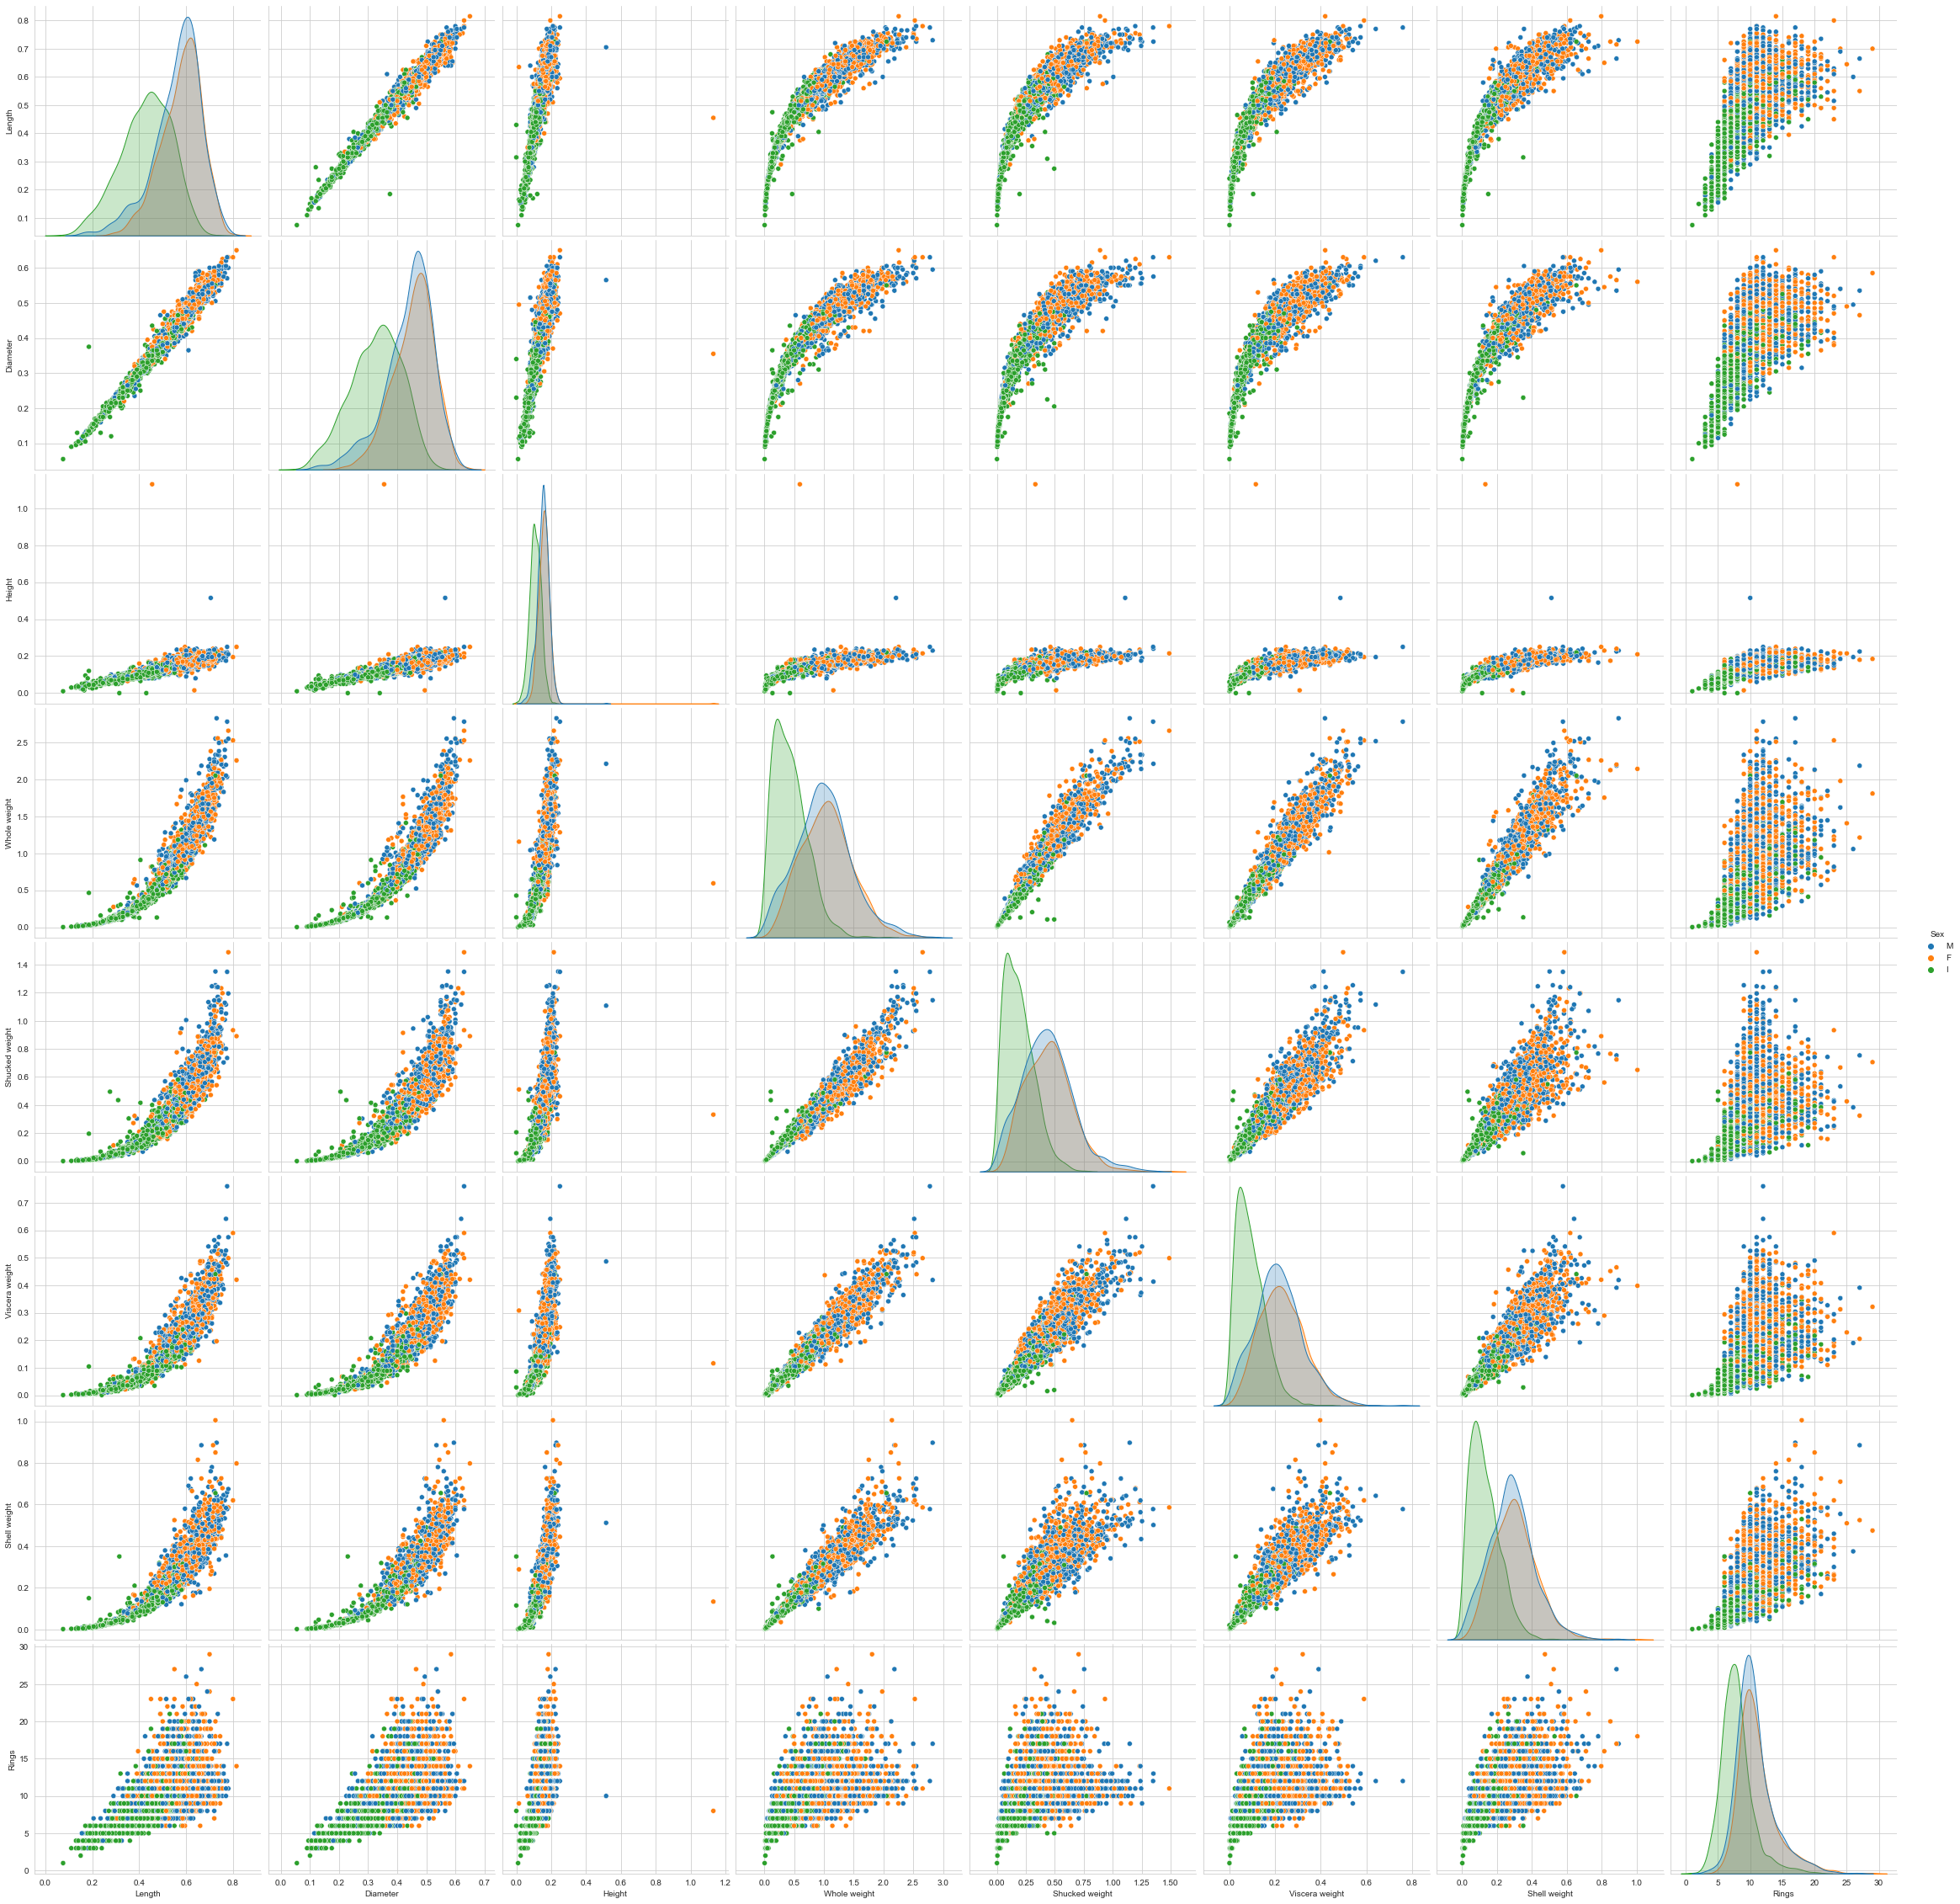

In [6]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='Sex',size=4);
plt.show()

In [7]:
# X=data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']]

# y=data['Sex']

# train_set,test_set=train_test_split(data,test_size=0.3,random_state=42)

In [10]:
# print(f'Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n')

In [11]:
X=data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']]

y=data['Sex']

X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
print('class counts')
print(y_test.value_counts(), end='\n\n')
print('class proportions')
print(y_test.value_counts() /len(y_test))

class counts
M    458
I    419
F    377
Name: Sex, dtype: int64

class proportions
M    0.365231
I    0.334131
F    0.300638
Name: Sex, dtype: float64


In [13]:
logisticRegr=LogisticRegression(solver='liblinear',fit_intercept=True)
logisticRegr.fit(X_train,y_train)
logis_pred=logisticRegr.predict(x_test)
logis_pred_prod=logisticRegr.predict_proba(x_test)

In [14]:
dummy=DummyClassifier(strategy='most_frequent')
dumb=dummy.fit(X_train,y_train)
dumb_pred=dumb.predict(x_test)
dumb_pred_prod=dumb.predict_proba(x_test)

In [15]:
print('Test accuracy (Logisiticb Regression)=',logisticRegr.score(x_test,y_test),end='\n\n')
print('Test accuracy (Dummy classifier)=',dumb.score(dumb_pred,y_test))

Test accuracy (Logisiticb Regression)= 0.5685805422647527

Test accuracy (Dummy classifier)= 0.3652312599681021


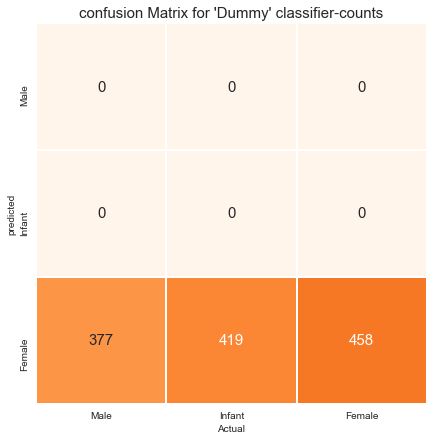

In [16]:
cm_dummy=confusion_matrix(y_test,dumb_pred)
cm_dummy_df=pd.DataFrame(cm_dummy)

fig,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm_dummy_df.T,annot= True,annot_kws={'size':15},cmap='Oranges',vmin=0,vmax=800,fmt='.0f',linewidths=1,linecolor='white',cbar=False,
           xticklabels=['Male','Infant','Female'],yticklabels=['Male','Infant','Female'])
plt.ylabel('predicted',fontsize=10)
plt.xlabel('Actual',fontsize=10)
ax.set_xticklabels(['Male','Infant','Female'],fontsize=10)
ax.set_yticklabels(['Male','Infant','Female'],fontsize=10)
plt.title("confusion Matrix for 'Dummy' classifier-counts",fontsize=15)
plt.show()

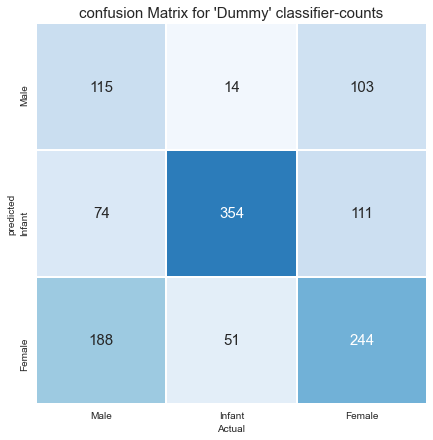

In [17]:
cm_logis=confusion_matrix(y_test,logis_pred)
cm_logis_df=pd.DataFrame(cm_logis)

fig,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm_logis_df.T,annot= True,annot_kws={'size':15},cmap='Blues',vmin=0,vmax=500,fmt='.0f',linewidths=1,linecolor='white',cbar=False,
           xticklabels=['Male','Infant','Female'],yticklabels=['Male','Infant','Female'])
plt.ylabel('predicted',fontsize=10)
plt.xlabel('Actual',fontsize=10)
ax.set_xticklabels(['Male','Infant','Female'],fontsize=10)
ax.set_yticklabels(['Male','Infant','Female'],fontsize=10)
plt.title("confusion Matrix for 'Dummy' classifier-counts",fontsize=15)
plt.show()

In [18]:
y_predict=logisticRegr.predict(x_test)
print("Accuracy LR: {:.2f}".format(logisticRegr.score(x_test,y_test)))

Accuracy LR: 0.57


In [19]:
y_predict=pd.DataFrame(y_predict,index=y_test.index,columns=['predict'])

In [20]:
dftest=pd.concat([y_test,y_predict])
df3=dftest.head(25)
df3.head()

,0,predict
866,M,NaN
1483,M,NaN
599,F,NaN
1702,F,NaN
670,M,NaN


Text(0, 0.5, 'Heigth')

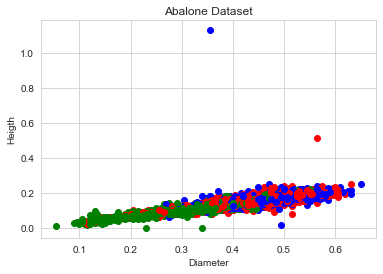

In [21]:
colors={'M':'r','I':'g','F':'b'}
fig, ax = plt.subplots()

for i in range(len(data["Diameter"])):
    ax.scatter(data['Diameter'][i],data['Height'][i],color=colors[data['Sex'][i]])
ax.set_title('Abalone Dataset')
ax.set_xlabel('Diameter')
ax.set_ylabel('Heigth')

In [22]:
from sklearn.cluster import KMeans

Kmeans=KMeans(3)

Kmeans.fit(X_train)

KMeans(n_clusters=3)

In [23]:
NN=X_train
NN['predict']=Kmeans.fit_predict(NN)

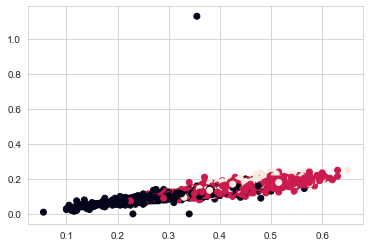

In [24]:
import matplotlib.pyplot as plt
plt.scatter(NN['Diameter'], NN['Height'],c=NN['predict'])